In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# %config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv('flights.csv')
df.dropna(inplace=True) #удалим рейсы, по которым нет купленных билетов

In [3]:
df.head()

,flight_id,flight_no,arrival_airport,city,actual_departure,actual_arrival,flight_time,model,fuel_consum_kg_hr,seat_economy,seat_bisiness,seat_total,sold_economy,sold_bisiness,sold_total,amount_economy,amount_bisiness,amount_total
0,136119,PG0252,SVO,Moscow,2017-01-03 10:08:00.000000,2017-01-03 11:49:00.000000,101,Boeing 737-300,2400,118,12,130,102.0,11.0,113.0,1250400.0,402600.0,1653000.0
1,136120,PG0252,SVO,Moscow,2017-02-24 10:07:00.000000,2017-02-24 11:46:00.000000,99,Boeing 737-300,2400,118,12,130,98.0,11.0,109.0,1202800.0,402600.0,1605400.0
2,136122,PG0252,SVO,Moscow,2017-01-08 10:08:00.000000,2017-01-08 11:48:00.000000,100,Boeing 737-300,2400,118,12,130,87.0,10.0,97.0,1065000.0,366000.0,1431000.0
3,136130,PG0252,SVO,Moscow,2017-02-13 10:07:00.000000,2017-02-13 11:46:00.000000,99,Boeing 737-300,2400,118,12,130,97.0,10.0,107.0,1190600.0,366000.0,1556600.0
4,136131,PG0252,SVO,Moscow,2017-01-28 10:07:00.000000,2017-01-28 11:46:00.000000,99,Boeing 737-300,2400,118,12,130,112.0,12.0,124.0,1373600.0,439200.0,1812800.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          118 non-null    int64  
 1   flight_no          118 non-null    object 
 2   arrival_airport    118 non-null    object 
 3   city               118 non-null    object 
 4   actual_departure   118 non-null    object 
 5   actual_arrival     118 non-null    object 
 6   flight_time        118 non-null    int64  
 7   model              118 non-null    object 
 8   fuel_consum_kg_hr  118 non-null    int64  
 9   seat_economy       118 non-null    int64  
 10  seat_bisiness      118 non-null    int64  
 11  seat_total         118 non-null    int64  
 12  sold_economy       118 non-null    float64
 13  sold_bisiness      118 non-null    float64
 14  sold_total         118 non-null    float64
 15  amount_economy     118 non-null    float64
 16  amount_bisiness    118 non

Переведем даты в формат datetime

In [5]:
df.actual_departure = pd.to_datetime(df.actual_departure)
df.actual_arrival = pd.to_datetime(df.actual_arrival)

Переведем время полета в часы

In [6]:
df.flight_time = df.flight_time / 60

Создадим признак расход топлива и затраты на топливо ( цена 1кг авиатовлива = 41.5 без НДС зима 2017) 

https://favt.gov.ru/stat-date-gsm-price/

In [7]:
df['fuel_spent'] = df.flight_time * df.fuel_consum_kg_hr 

In [8]:
df['fuel_cost'] = df.fuel_spent * (41.5*1.18)

Создадим признак прибыль с вычетом затрат на топливо

In [9]:
df['profit'] =  df.amount_total - df.fuel_cost
df.profit = df.profit.astype('int64')

Посчитаем загруженость рейсов в процентах

In [10]:
df['seats_percent'] = df.sold_total / df.seat_total

In [11]:
df[df.seats_percent < 0.75]

,flight_id,flight_no,arrival_airport,city,actual_departure,actual_arrival,flight_time,model,fuel_consum_kg_hr,seat_economy,seat_bisiness,seat_total,sold_economy,sold_bisiness,sold_total,amount_economy,amount_bisiness,amount_total,fuel_spent,fuel_cost,profit,seats_percent
2,136122,PG0252,SVO,Moscow,2017-01-08 10:08:00,2017-01-08 11:48:00,1.666667,Boeing 737-300,2400,118,12,130,87.0,10.0,97.0,1065000.0,366000.0,1431000.0,4000.000000,195880.000000,1235120,0.746154
38,136360,PG0252,SVO,Moscow,2017-02-05 10:08:00,2017-02-05 11:48:00,1.666667,Boeing 737-300,2400,118,12,130,86.0,11.0,97.0,1052800.0,402600.0,1455400.0,4000.000000,195880.000000,1259520,0.746154
68,136642,PG0480,EGO,Belgorod,2017-01-30 09:28:00,2017-01-30 10:17:00,0.816667,Sukhoi Superjet-100,1700,85,12,97,54.0,10.0,64.0,342000.0,189000.0,531000.0,1388.333333,67986.683333,463013,0.659794
93,136807,PG0480,EGO,Belgorod,2017-02-23 09:28:00,2017-02-23 10:18:00,0.833333,Sukhoi Superjet-100,1700,85,12,97,60.0,8.0,68.0,379800.0,151200.0,531000.0,1416.666667,69374.166667,461625,0.701031


Посмотрим направления по всем рейсам и разберем каждое в отдельности

In [12]:
df.flight_no.unique()

array(['PG0252', 'PG0480'], dtype=object)

In [13]:
df_amount_stat = df.groupby('flight_no').amount_total.agg(['min', 'mean', 'max']).astype('int64').reset_index()

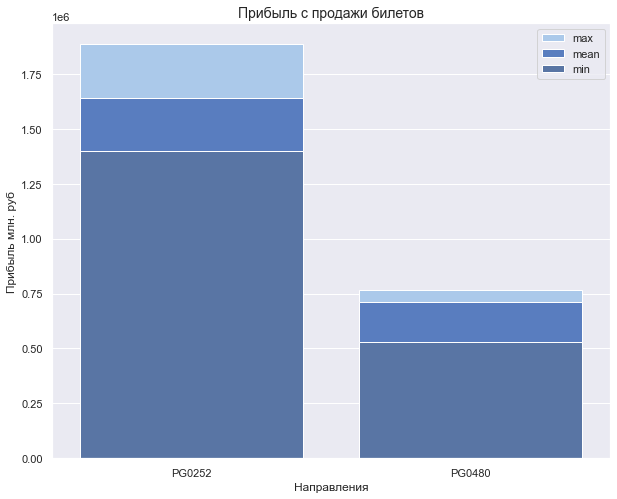

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set_color_codes('pastel')
sns.barplot(x='flight_no', y='max', data=df_amount_stat,color = 'b', label = 'max')
sns.set_color_codes('muted')
sns.barplot(x='flight_no', y='mean', data=df_amount_stat, color = 'b', label = 'mean')
sns.set_color_codes('deep')
sns.barplot(x='flight_no', y='min', data=df_amount_stat, color = 'b', label = 'min')
ax.legend(loc = 1)
plt.ylabel(None)
ax.set_title('Прибыль с продажи билетов',fontsize= 14)
ax.set_xlabel('Направления')
ax.set_ylabel('Прибыль млн. руб');
# fig.savefig('Прибыль с продажи билетов.svg')

Посмотрим на заполненость рейсов

In [15]:
df_seats_stat = df.groupby('flight_no').sold_total.agg(['min', 'mean', 'max']).astype('int64').reset_index()

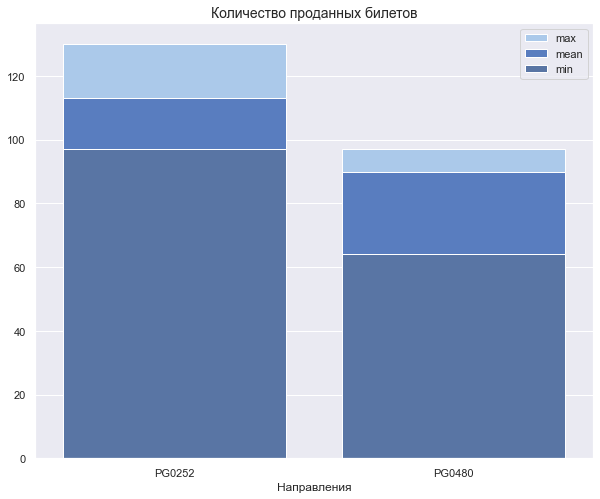

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set_color_codes('pastel')
sns.barplot(x='flight_no', y='max', data=df_seats_stat,color = 'b', label = 'max')
sns.set_color_codes('muted')
sns.barplot(x='flight_no', y='mean', data=df_seats_stat, color = 'b', label = 'mean')
sns.set_color_codes('deep')
sns.barplot(x='flight_no', y='min', data=df_seats_stat, color = 'b', label = 'min')
ax.legend(loc = 1)
plt.ylabel(None)
ax.set_title('Количество проданных билетов',fontsize= 14)
ax.set_xlabel('Направления');
# fig.savefig('Количество проданных билетов.svg')

In [17]:
# метки в виде текста
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

Посмотрим на прибыль относительно заполнености самолета. Неприбыльными будем считать самолеты с заполненостью <= 0.75 и создадим список рейсов с такими показателями.
https://www.kommersant.ru/doc/3246832

In [18]:
flight_unprofit1 = list(df[df.seats_percent < 0.75].flight_id)
flight_unprofit1

[136122, 136360, 136642, 136807]

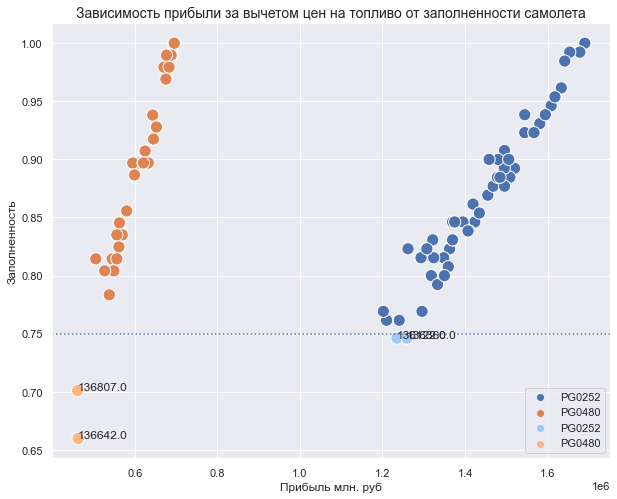

In [19]:
df1 = df[df.seats_percent > 0.75]
df2 = df[df.seats_percent <= 0.75]

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='profit', y='seats_percent', data=df1,
                hue='flight_no', s=150, palette="deep")
sns.scatterplot(x='profit', y='seats_percent', data=df2,
                hue='flight_no', s=150, palette="pastel")
sns.set_color_codes('pastel')
plt.axhline(0.75, linestyle=':')
ax.legend(loc=4)
ax.set_title(
    'Зависимость прибыли за вычетом цен на топливо от заполненности самолета', fontsize=14)
ax.set_xlabel('Прибыль млн. руб')
ax.set_ylabel('Заполненность')

label_point(df2.profit,
            df2.seats_percent,
            df2.flight_id,
            plt.gca())
# fig.savefig('Прибыльность по заполнености.svg')

Найдем, для каждого направления с низкой заполненостью, границу, после которой рейсы считаются неприбыльными. Создадим список таких рейсов.

In [20]:
max_unprofit_PG0480 =  df[(df.flight_no == 'PG0480') & (df.seats_percent <= 0.75)].profit.max()
max_unprofit_PG0252 =  df[(df.flight_no == 'PG0252') & (df.seats_percent <= 0.75)].profit.max()

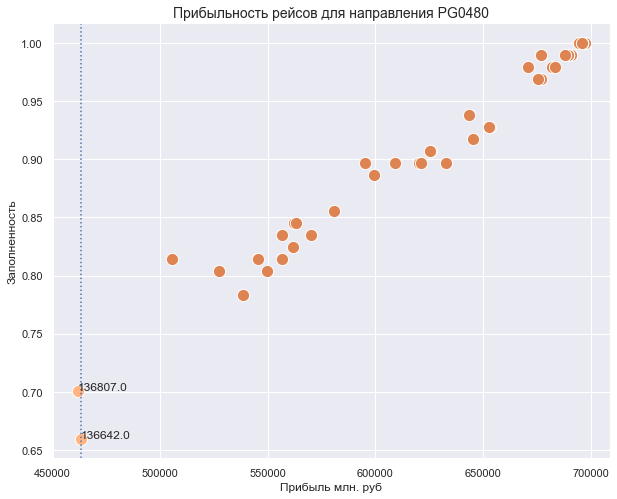

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='profit', y='seats_percent',
                data=df1[df1.flight_no == 'PG0480'], s=150, color='#DD8452', palette="deep")
sns.scatterplot(x='profit', y='seats_percent',
                data=df2[df2.flight_no == 'PG0480'], s=150, color='#FFB482', palette="pastel")
ax.axvline(max_unprofit_PG0480, linestyle=':')
ax.set_title('Прибыльность рейсов для направления PG0480', fontsize= 14)
ax.set_xlabel('Прибыль млн. руб')
ax.set_ylabel('Заполненность');

label_point(df2[df2.flight_no == 'PG0480'].profit,
            df2[df2.flight_no == 'PG0480'].seats_percent,
            df2[df2.flight_no == 'PG0480'].flight_id,
            plt.gca())
# fig.savefig('Прибыльность PG0480.svg')

In [22]:
df3 = df[df.profit <= max_unprofit_PG0252]
df4 = df[df.profit > max_unprofit_PG0252]

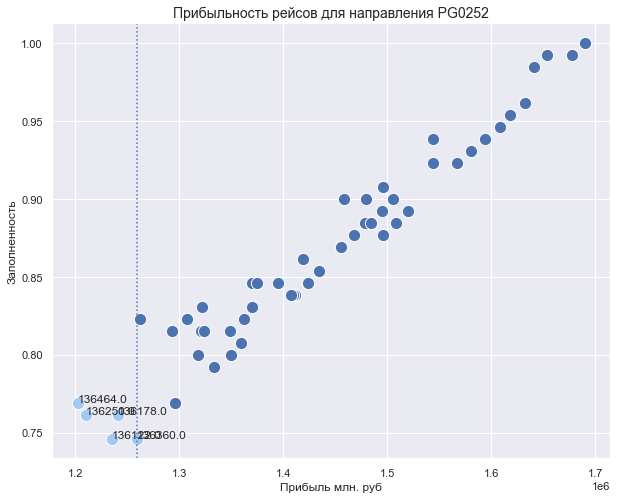

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='profit', y='seats_percent',
                data=df4[df4.flight_no == 'PG0252'], s=150, color='#4C72B0', palette="deep")
sns.scatterplot(x='profit', y='seats_percent',
                data=df3[df3.flight_no == 'PG0252'], s=150, color='#A1C9F4', palette="pastel")
ax.axvline(max_unprofit_PG0252, linestyle=':')
ax.set_title('Прибыльность рейсов для направления PG0252', fontsize= 14)
ax.set_xlabel('Прибыль млн. руб')
ax.set_ylabel('Заполненность');

label_point(df3[df3.flight_no == 'PG0252'].profit,
            df3[df3.flight_no == 'PG0252'].seats_percent,
            df3[df3.flight_no == 'PG0252'].flight_id,
            plt.gca())  
# fig.savefig('Прибыльность PG0252.svg')

In [24]:
flight_unprofit2 = list(df3[df3.flight_no == 'PG0252'].flight_id)

Мой прогноз неприбыльных рейсов

In [25]:
flight_unprofit = set(flight_unprofit1 + flight_unprofit2)

In [26]:
flight_unprofit

{136122, 136178, 136250, 136360, 136464, 136642, 136807}

In [27]:
df[df.flight_id.isin(flight_unprofit)]

,flight_id,flight_no,arrival_airport,city,actual_departure,actual_arrival,flight_time,model,fuel_consum_kg_hr,seat_economy,seat_bisiness,seat_total,sold_economy,sold_bisiness,sold_total,amount_economy,amount_bisiness,amount_total,fuel_spent,fuel_cost,profit,seats_percent
2,136122,PG0252,SVO,Moscow,2017-01-08 10:08:00,2017-01-08 11:48:00,1.666667,Boeing 737-300,2400,118,12,130,87.0,10.0,97.0,1065000.0,366000.0,1431000.0,4000.000000,195880.000000,1235120,0.746154
12,136178,PG0252,SVO,Moscow,2017-01-29 10:10:00,2017-01-29 11:49:00,1.650000,Boeing 737-300,2400,118,12,130,90.0,9.0,99.0,1105200.0,329400.0,1434600.0,3960.000000,193921.200000,1240678,0.761538
21,136250,PG0252,SVO,Moscow,2017-02-08 10:06:00,2017-02-08 11:47:00,1.683333,Boeing 737-300,2400,118,12,130,91.0,8.0,99.0,1115000.0,292800.0,1407800.0,4040.000000,197838.800000,1209961,0.761538
38,136360,PG0252,SVO,Moscow,2017-02-05 10:08:00,2017-02-05 11:48:00,1.666667,Boeing 737-300,2400,118,12,130,86.0,11.0,97.0,1052800.0,402600.0,1455400.0,4000.000000,195880.000000,1259520,0.746154
54,136464,PG0252,SVO,Moscow,2017-01-09 10:07:00,2017-01-09 11:47:00,1.666667,Boeing 737-300,2400,118,12,130,93.0,7.0,100.0,1141800.0,256200.0,1398000.0,4000.000000,195880.000000,1202120,0.769231
68,136642,PG0480,EGO,Belgorod,2017-01-30 09:28:00,2017-01-30 10:17:00,0.816667,Sukhoi Superjet-100,1700,85,12,97,54.0,10.0,64.0,342000.0,189000.0,531000.0,1388.333333,67986.683333,463013,0.659794
93,136807,PG0480,EGO,Belgorod,2017-02-23 09:28:00,2017-02-23 10:18:00,0.833333,Sukhoi Superjet-100,1700,85,12,97,60.0,8.0,68.0,379800.0,151200.0,531000.0,1416.666667,69374.166667,461625,0.701031
